<a href="https://colab.research.google.com/github/DwayneLi/CFPB_Consumer_Complaints_Analysis/blob/master/Complaint_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents of complaint analysis

## Get date and necessary packages

In [1]:
!wget -q https://www.dropbox.com/s/xzqxcw2yiz2mwie/complaints.csv

--2020-10-14 21:58:01--  https://www.dropbox.com/s/xzqxcw2yiz2mwie/complaints.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xzqxcw2yiz2mwie/complaints.csv [following]
--2020-10-14 21:58:02--  https://www.dropbox.com/s/raw/xzqxcw2yiz2mwie/complaints.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc33bee7c9eb8249dca3592f47af.dl.dropboxusercontent.com/cd/0/inline/BBTxC88kHn8iY3hPDbjgUe3KEVSwP3r8Mfletks61uekwEwQ_ZOxScS-13AHxYbRnULmrm1Z2QMk0wntsK77KrEX1E_12FtLyfCUQYixhy97laOABzwT5fqKnxY0E97CJSE/file# [following]
--2020-10-14 21:58:02--  https://uc33bee7c9eb8249dca3592f47af.dl.dropboxusercontent.com/cd/0/inline/BBTxC88kHn8iY3hPDbjgUe3KEVSwP3r8Mfletks61uekwEwQ_ZOxScS-13AHxYbRnULmrm1Z2QMk0wntsK77KrEX1E_12FtLyfCUQYixh

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('complaints.csv')

## Clean data



### Merge products under same category.

There are product classifications before and after 2017-05. In order to analyze data exactlly, we put the same sub-group under new classification of products. 

First we check the duplicate sub product group and mark them by latest record date.


In [48]:
# transform date into date format
df['Date received']=df['Date received'].apply(pd.to_datetime)

In [87]:
# check the duplicate sub product group.
product=df.pivot_table(['Complaint ID','Date received'],['Product','Sub-product'],aggfunc={'Complaint ID':lambda x: x.value_counts().count(),'Date received':max})
product.reset_index(inplace=True)#.to_csv('product_list.csv')
product.head()

,Product,Sub-product,Complaint ID,Date received
0,Bank account or service,(CD) Certificate of deposit,3417,2017-04-22
1,Bank account or service,Cashing a check without an account,625,2017-04-18
2,Bank account or service,Checking account,59045,2017-04-22
3,Bank account or service,Other bank product/service,17825,2017-04-21
4,Bank account or service,Savings account,5294,2017-04-21
...,...,...,...,...
91,Vehicle loan or lease,Lease,2720,2020-04-01
92,Vehicle loan or lease,Loan,13621,2020-04-02
93,Vehicle loan or lease,Title loan,15,2019-11-19
94,Virtual currency,Domestic (US) money transfer,17,2017-04-03


In [110]:
product[product['Sub-product'].duplicated(keep=False)].sort_values('Sub-product').head()

,Product,Sub-product,Complaint ID,Date received
2,Bank account or service,Checking account,59045,2017-04-22
6,Checking or savings account,Checking account,45645,2020-04-02
58,Mortgage,Conventional home mortgage,41720,2020-04-02
23,"Credit reporting, credit repair services, or o...",Conventional home mortgage,1,2018-05-22
69,Other financial service,Debt settlement,333,2017-04-21


In [111]:
# Payday loan, title loan, or personal loan
df.loc[df['Sub-product'] == 'Pawn loan','Product']='Payday loan, title loan, or personal loan'
df.loc[df['Sub-product'] == 'Personal line of credit','Product']='Payday loan, title loan, or personal loan'
df.loc[df['Sub-product'] == 'Installment loan','Product']='Payday loan, title loan, or personal loan'

# Money transfer, virtual currency, or money service 
df['Product'].replace('Other financial service','Money transfer, virtual currency, or money service',inplace=True)
df['Sub-product'].replace('Check cashing','Check cashing service',inplace=True)
df['Sub-product'].replace('Traveler’s/Cashier’s checks',"Traveler's check or cashier's check",inplace=True)
df['Product'].replace('Money transfers','Money transfer, virtual currency, or money service',inplace=True)
df['Product'].replace('Virtual currency','Money transfer, virtual currency, or money service',inplace=True)

# Checking or savings account
df['Product'].replace('Bank account or service','Checking or savings account',inplace=True)
df['Sub-product'].replace('(CD) Certificate of deposit',"CD (Certificate of Deposit)",inplace=True)

# Credit card or prepaid card
df['Product'].replace('Prepaid card','Credit card or prepaid card',inplace=True)
df['Sub-product'].replace('Government benefit payment card',"Government benefit card",inplace=True)
df['Sub-product'].replace('ID prepaid card',"ID prepaid card",inplace=True)

# Vehicle loan or lease
df['Product'].replace('Consumer Loan','Vehicle loan or lease',inplace=True)
df['Sub-product'].replace('Vehicle lease','Lease',inplace=True)
df['Sub-product'].replace('Vehicle loan','Loan',inplace=True)

In [113]:
product=df.pivot_table(['Complaint ID','Date received'],['Product','Sub-product'],aggfunc={'Complaint ID':lambda x: x.value_counts().count(),'Date received':max})
product.reset_index(inplace=True)#.to_csv('product_list.csv')
product[product['Sub-product'].duplicated(keep=False)].sort_values('Sub-product')

,Product,Sub-product,Complaint ID,Date received
20,"Credit reporting, credit repair services, or o...",Conventional home mortgage,1,2018-05-22
54,Mortgage,Conventional home mortgage,41720,2020-04-02
35,Debt collection,Non-federal student loan,2881,2017-04-21
69,Student loan,Non-federal student loan,22283,2017-04-21
38,Debt collection,Payday loan,7563,2017-04-21
65,"Payday loan, title loan, or personal loan",Payday loan,3781,2020-03-30
67,"Payday loan, title loan, or personal loan",Title loan,1128,2020-03-30
73,Vehicle loan or lease,Title loan,562,2019-11-19


Remain duplicate records exist in the classification of CFPB website.


### Merge issues under same category.

In [114]:
df.pivot_table('Sub-product',['Product'],aggfunc={'Sub-product':lambda x: x.value_counts().count()})#.sort_values('Sub-product')

,Sub-product
Product,
Checking or savings account,6
Credit card,0
Credit card or prepaid card,14
Credit reporting,0
"Credit reporting, credit repair services, or other personal consumer reports",4
Debt collection,17
"Money transfer, virtual currency, or money service",11
Mortgage,11
Payday loan,0


Group the issues and sub issues

In [122]:
issuedate=df.pivot_table(['Complaint ID','Date received'],['Issue','Sub-issue'],aggfunc={'Complaint ID':lambda x: x.value_counts().count(),'Date received':max}).reset_index()
issuedate.head()#.pivot_table(['Sub-issue','Date received'],['Sub-issue'],aggfunc={'Sub-issue':lambda x:x.count(),'Date received':max})

,Issue,Sub-issue,Complaint ID,Date received
0,Advertising,Changes in terms from what was offered or adve...,33,2020-03-10
1,Advertising,Confusing or misleading advertising about the ...,107,2020-03-23
2,"Advertising and marketing, including promotion...",Confusing or misleading advertising about the ...,1724,2020-03-24
3,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,2648,2020-03-31
4,Can't repay my loan,Can't decrease my monthly payments,4054,2017-04-21


Check duplicate sub issues

In [121]:
issuedate[issuedate['Sub-issue'].duplicated(keep=False)].sort_values('Sub-issue').head()#.to_excel('issuedate.xlsx')

,Issue,Sub-issue,Complaint ID,Date received
35,Credit monitoring or identity theft protection...,Billing dispute for services,1624,2020-04-02
91,Identity theft protection or other monitoring ...,Billing dispute for services,58,2020-03-07
11,Closing an account,Can't close your account,1591,2020-03-25
15,Closing your account,Can't close your account,1374,2020-03-26
12,Closing an account,Company closed your account,3088,2020-03-30


In [120]:
df['Issue'].replace('Problem with overdraft','Problem with an overdraft',inplace=True)
#df['Sub-product'].replace('Check cashing','Check cashing service',inplace=True)

df['Issue'].replace("Problem with a company's investigation into an existing issue","Problem with a credit reporting company's investigation into an existing problem",inplace=True)
df['Issue'].replace("Getting a loan","Getting a loan or lease",inplace=True)
df['Issue'].replace("Identity theft protection or other monitoring services","Credit monitoring or identity theft protection services",inplace=True)
df['Issue'].replace("Closing your account","Closing an account",inplace=True)
df['Issue'].replace("Attempts to collect debt not owed","Cont'd attempts collect debt not owed",inplace=True)
df['Issue'].replace("Problem with an overdraft","Problem with an overdraft",inplace=True)
df['Issue'].replace("Struggling to pay your bill","Struggling to repay your loan",inplace=True)

In [56]:
issuedate.reset_index().to_excel('issuedate.xlsx')

## Exploration of data

### We want to use plots to show the relationship among products and issues.

In [123]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500


In [ ]:
help(plt.stackplot)

In [160]:
df=df.rename(columns={'Complaint ID':'id'})

ValueError: ignored

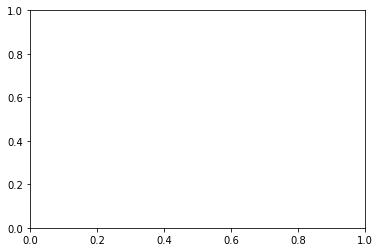

In [127]:
plt.stackplot('Complaint ID',data=df,labels='Product')

In [129]:
import datetime

In [143]:
df['year']=pd.DatetimeIndex(df['Date received']).year
df['month']=pd.DatetimeIndex(df['Date received']).month

In [157]:
pd.DataFrame(df.groupby(['Product','year'])['year'].value_counts())

year
Product                     year year       
Checking or savings account 2012 2012  12212
                            2013 2013  13388
                            2014 2014  14662
                            2015 2015  17140
                            2016 2016  21848
...                                      ...
Vehicle loan or lease       2016 2016   6184
                            2017 2017   6024
                            2018 2018   5892
                            2019 2019   5489
                            2020 2020   1281

[91 rows x 1 columns]

In [180]:
tmp

TypeError: ignored

<Figure size 1440x720 with 0 Axes>

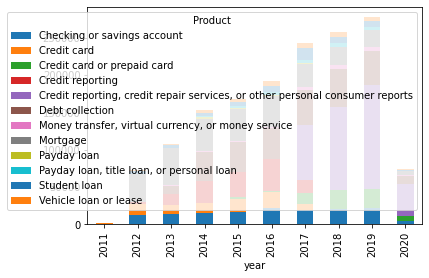

In [183]:

tmp=df.groupby(['year','Product']).id.count().sort_values(ascending=False)
plt.figure(figsize=(20,10))
tmp.unstack().plot(kind='bar',stacked=True)

In [164]:
df.pivot_table(['Product','id'],columns=['year'],aggfunc={'id':lambda x:x.value_counts().count()})

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
id,2536,72373,108217,153043,168475,191469,242967,257317,277393,74604


In [167]:
productyear=df.pivot_table(['id'],['year','Product'],aggfunc={'id':lambda x: x.value_counts().count()}).reset_index()
productyear

,year,Product,id
0,2011,Credit card,1260
1,2011,Mortgage,1276
2,2012,Checking or savings account,12212
3,2012,Credit card,15353
4,2012,Credit reporting,1873
...,...,...,...
86,2020,"Money transfer, virtual currency, or money ser...",1115
87,2020,Mortgage,5142
88,2020,"Payday loan, title loan, or personal loan",936
89,2020,Student loan,1371


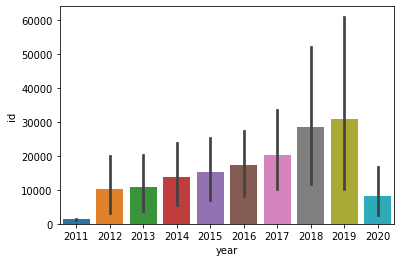

In [171]:
sns.barplot(x='year',y='id',data=productyear)

In [169]:
df.pivot_table(['id'],['year'],aggfunc={'id':lambda x: x.value_counts().count()}).reset_index()

,year,id
0,2011,2536
1,2012,72373
2,2013,108217
3,2014,153043
4,2015,168475
5,2016,191469
6,2017,242967
7,2018,257317
8,2019,277393
9,2020,74604


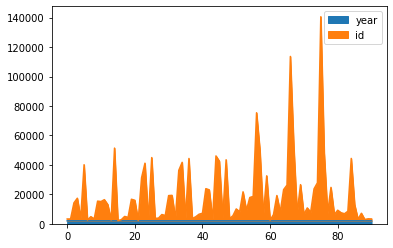

In [168]:
productyear.plot.area()

In [170]:
tmp=pd.DataFrame(columns=["App","Feature1", "Feature2","Feature3",
                           "Feature4","Feature5",
                           "Feature6","Feature7","Feature8"], 
                  data=[["SHA",0,0,1,1,1,0,1,0],
                        ["LHA",1,0,1,1,0,1,1,0],
                        ["DRA",0,0,0,0,0,0,1,0],
                        ["FRA",1,0,1,1,1,0,1,1],
                        ["BRU",0,0,1,0,1,0,0,0],
                        ["PAR",0,1,1,1,1,0,1,0],
                        ["AER",0,0,1,1,0,1,1,0],
                        ["SHE",0,0,0,1,0,0,1,0]])
tmp

,App,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8
0,SHA,0,0,1,1,1,0,1,0
1,LHA,1,0,1,1,0,1,1,0
2,DRA,0,0,0,0,0,0,1,0
3,FRA,1,0,1,1,1,0,1,1
4,BRU,0,0,1,0,1,0,0,0
5,PAR,0,1,1,1,1,0,1,0
6,AER,0,0,1,1,0,1,1,0
7,SHE,0,0,0,1,0,0,1,0
